# Handle Categorical Features

### importing librarries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import stat

%matplotlib inline

# Nominal Encoding

Nominal data is data that can be labelled or classified into mutually exclusive categories within a variable. These categories cannot be ordered in a meaningful way.

For example, for the nominal variable of preferred mode of transportation, you may have the categories of car, bus, train, tram or bicycle.

## 1. One Hot Encoding
___

### Advantage:
- easy to implement

### Disadvantage:
- space. for every feature thre will be created n-1 unique features
- curse of dimensionality
___

Always remember to drop 1 extra column otherwise it wil create multi-colinearity.

### example 1

In [2]:
df=pd.read_csv('titanic.csv',usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [3]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [4]:
pd.get_dummies(df, drop_first=True).head() # to avoid multi-colinearity

,Sex_male
0,1
1,0
2,0
3,0
4,1


### example 2

In [5]:
df=pd.read_csv('titanic.csv',usecols=['Embarked'])

In [6]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
df.dropna(inplace=True) # just droping empty cells, otherwise we should fill na with "NA"

In [8]:
pd.get_dummies(df).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [9]:
pd.get_dummies(df, drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


### Advantages

1. It is very simple to implement
2. Does not increase the feature dimensional space

### Disadvantages

1. If some of the labels have the same count, then they will be replaced with the same count and they will loose some valuable information.

2 Adds somewhat arbitrary numbers, and therefore weights to the different labels, that may not be related to their predictive power

Follow this thread in Kaggle for more information:
https://www.kaggle.com/general/16927

## 2. Onehot encoding with many categories in a feature
___

This technique used in KDD orange cup. Only need to allpy onehot encoding to top 10 most frequent labels or categories.
___

#### KDD Cup Orange Challenge

What can we do instead?

http://proceedings.mlr.press/v7/niculescu09/niculescu09.pdf
In the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble 

The Team suggested using 10 most frequent labels convert them into dummy variables using onehotencoding

In [10]:
df=pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [11]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [12]:
count = 0
for col in df.columns:
    count += df[col].nunique()
    print(f"{col} have {df[col].nunique():>3} unique-cols")
count

X0 have  47 unique-cols
X1 have  27 unique-cols
X2 have  44 unique-cols
X3 have   7 unique-cols
X4 have   4 unique-cols
X5 have  29 unique-cols
X6 have  12 unique-cols


170

if we use normal one-hot encoding then it will create 170 number of extra columns which is a lot because we originally have 7 columns and from 7 to 170; 10X it will make model quality very bad as well as consuming a lot more space. 

In [13]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [14]:
lst_10 = df.X1.value_counts().sort_values(ascending=False).head(10).index

In [15]:
for index in df['X4'].value_counts().nlargest(10).index:
    print(index)

d
a
c
b


In [16]:
lst_10.shape

(10,)

In [17]:
import numpy as np


def one_hot_encode_many(df, feature, drop_first=False):
    counts = df[feature].nunique()
    top_10 = list(df[feature].value_counts().nlargest(10).index)
    
    if counts <= 10:
        top_10.pop()
    
    for category in top_10:
        new_name = feature + f"_{category}"
        
        df[new_name] = np.where(df[feature]==category, 1, 0)
    
    if drop_first == True:
        dp.drop(columns=[feature], inplace=True)

In [18]:
one_hot_encode_many(df, "X1")

In [19]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0


In [20]:
one_hot_encode_many(df, "X0")
one_hot_encode_many(df, "X2")
one_hot_encode_many(df, "X3")
one_hot_encode_many(df, "X4")
one_hot_encode_many(df, "X5")
one_hot_encode_many(df, "X6")

In [21]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X1_aa,X1_s,X1_b,...,X6_g,X6_j,X6_d,X6_i,X6_l,X6_a,X6_h,X6_k,X6_c,X6_b
0,k,v,at,a,d,u,j,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [22]:
df.shape

(4209, 66)

In [23]:
df.drop(columns=['X0','X1','X2','X3','X4','X5','X6'], inplace=True)

In [24]:
df.head()

,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o,...,X6_g,X6_j,X6_d,X6_i,X6_l,X6_a,X6_h,X6_k,X6_c,X6_b
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
df.columns

Index(['X1_aa', 'X1_s', 'X1_b', 'X1_l', 'X1_v', 'X1_r', 'X1_i', 'X1_a', 'X1_c',
       'X1_o', 'X0_z', 'X0_ak', 'X0_y', 'X0_ay', 'X0_t', 'X0_x', 'X0_o',
       'X0_f', 'X0_n', 'X0_w', 'X2_as', 'X2_ae', 'X2_ai', 'X2_m', 'X2_ak',
       'X2_r', 'X2_n', 'X2_s', 'X2_f', 'X2_e', 'X3_c', 'X3_f', 'X3_a', 'X3_d',
       'X3_g', 'X3_e', 'X4_d', 'X4_a', 'X4_c', 'X5_w', 'X5_v', 'X5_q', 'X5_r',
       'X5_s', 'X5_d', 'X5_n', 'X5_m', 'X5_p', 'X5_i', 'X6_g', 'X6_j', 'X6_d',
       'X6_i', 'X6_l', 'X6_a', 'X6_h', 'X6_k', 'X6_c', 'X6_b'],
      dtype='object')

## 3. Mean Encoding
___

it it only applicable to classification problems
In mean encoding we replace categorical values by count of 1s/ count of 1s and 0s per feature
___

#### Pros of MeanEncoding:

Capture information within the label, therefore rendering more predictive features
Creates a monotonic relationship between the variable and the target

#### Cons of MeanEncodig:

It may cause over-fitting in the model.

### example 1

In [26]:
data={'SubjectName':['s1','s2','s3','s1','s4','s3','s2','s1','s2','s4','s1'],
      'Target':[1,0,1,1,1,0,0,1,1,1,0]}

df = pd.DataFrame(data)
df

,SubjectName,Target
0,s1,1
1,s2,0
2,s3,1
3,s1,1
4,s4,1
5,s3,0
6,s2,0
7,s1,1
8,s2,1
9,s4,1


In [27]:
df.groupby("SubjectName")['Target'].sum()

SubjectName
s1    3
s2    1
s3    1
s4    2
Name: Target, dtype: int64

In [28]:
df.groupby("SubjectName")['Target'].mean()

SubjectName
s1    0.750000
s2    0.333333
s3    0.500000
s4    1.000000
Name: Target, dtype: float64

In [29]:
x = df.groupby("SubjectName")['Target'].mean().to_dict()
x

{'s1': 0.75, 's2': 0.3333333333333333, 's3': 0.5, 's4': 1.0}

In [30]:
df['SubjectName_mean'] = df['SubjectName'].map(x)
df

,SubjectName,Target,SubjectName_mean
0,s1,1,0.750000
1,s2,0,0.333333
2,s3,1,0.500000
3,s1,1,0.750000
4,s4,1,1.000000
5,s3,0,0.500000
6,s2,0,0.333333
7,s1,1,0.750000
8,s2,1,0.333333
9,s4,1,1.000000


In [31]:
df.drop('SubjectName', axis=1)

,Target,SubjectName_mean
0,1,0.750000
1,0,0.333333
2,1,0.500000
3,1,0.750000
4,1,1.000000
5,0,0.500000
6,0,0.333333
7,1,0.750000
8,1,0.333333
9,1,1.000000


In [32]:
def mean_encoding(df, feature, targetVar, drop_first=False):
    mean = df.groupby(feature)[targetVar].mean().to_dict()
    new_name = feature + '_mean'
    
    df[new_name] = df[feature].map(mean)
    
    if drop_first == True:
        df.drop(columns=[feature], inplace=True)

In [33]:
data={'SubjectName':['s1','s2','s3','s1','s4','s3','s2','s1','s2','s4','s1'],
      'Target':[1,0,1,1,1,0,0,1,1,1,0]}

df = pd.DataFrame(data)
df

,SubjectName,Target
0,s1,1
1,s2,0
2,s3,1
3,s1,1
4,s4,1
5,s3,0
6,s2,0
7,s1,1
8,s2,1
9,s4,1


In [34]:
mean_encoding(df, 'SubjectName', 'Target', drop_first=True)
df

,Target,SubjectName_mean
0,1,0.750000
1,0,0.333333
2,1,0.500000
3,1,0.750000
4,1,1.000000
5,0,0.500000
6,0,0.333333
7,1,0.750000
8,1,0.333333
9,1,1.000000


### Count Encoding

In [72]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [73]:
train_set.shape

(32561, 15)

In [74]:
train_set.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [75]:
columns = [1,3,5,6,7,8,9,13]

In [76]:
train_set=train_set[columns]
train_set.head()

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [85]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [90]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [87]:
for col in train_set.columns:
    print(col)

Employment
Degree
Status
Designation
family_job
Race
Sex
Country


In [91]:
for col in train_set.columns:
    print(f"{col} : {train_set[col].nunique()}")

Employment : 9
Degree : 16
Status : 7
Designation : 15
family_job : 6
Race : 5
Sex : 2
Country : 42


In [93]:
for col in train_set.columns:
    print(f"{col} : {train_set[col].unique()}")
    print("=" * 50)

Employment : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Degree : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Designation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
family_job : [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Race : [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
Sex : [' Male' ' Female']
Country : [' United-States' ' Cuba' ' Jamaica' ' India' ' ?

In [97]:
train_set['Employment'] = train_set['Employment'].replace({' ?' : "MISSING"})
train_set['Designation'] = train_set['Designation'].replace({' ?' : "MISSING"})
train_set['Country'] = train_set['Country'].replace({' ?' : "MISSING"})

In [98]:
for col in train_set.columns:
    print(f"{col} : {train_set[col].unique()}")
    print("=" * 50)

Employment : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 'MISSING' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Degree : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Designation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' 'MISSING'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
family_job : [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Race : [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
Sex : [' Male' ' Female']
Country : [' United-States' ' Cuba' ' Jamaica' ' 

In [99]:
train_set.isnull().sum()

Employment     0
Degree         0
Status         0
Designation    0
family_job     0
Race           0
Sex            0
Country        0
dtype: int64

In [101]:
train_set['Country'].value_counts().to_dict()

{' United-States': 29170,
 ' Mexico': 643,
 'MISSING': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' Greece': 29,
 ' France': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Trinadad&Tobago': 19,
 ' Cambodia': 19,
 ' Thailand': 18,
 ' Laos': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Hungary': 13,
 ' Honduras': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [102]:
def count_encoding(df, feature):
    count_dict = train_set[feature].value_counts().to_dict()
    df[feature] = df[feature].map(count_dict)

In [103]:
count_encoding(train_set, 'Country')

In [104]:
train_set['Country'].unique()

array([29170,    95,    81,   100,   583,   643,    80,   114,    13,
          90,   121,   137,    43,   198,    73,    60,    59,    19,
          18,    28,    51,    44,    37,    70,   106,    29,    64,
          75,    62,    16,    31,    14,    12,    34,    67,    20,
          24,     1], dtype=int64)

In [105]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


In [106]:
train_set['Country'].value_counts().to_dict()

{29170: 29170,
 643: 643,
 583: 583,
 198: 198,
 137: 137,
 121: 121,
 114: 114,
 106: 106,
 100: 100,
 95: 95,
 90: 90,
 81: 81,
 80: 80,
 75: 75,
 73: 73,
 70: 70,
 67: 67,
 64: 64,
 62: 62,
 60: 60,
 59: 59,
 29: 58,
 51: 51,
 44: 44,
 43: 43,
 19: 38,
 37: 37,
 18: 36,
 34: 34,
 31: 31,
 28: 28,
 13: 26,
 24: 24,
 20: 20,
 16: 16,
 14: 14,
 12: 12,
 1: 1}

In [107]:
for col in train_set.columns:
    count_encoding(train_set, col)

In [108]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,1298,5355,10683,3770,8305,27816,21790,29170
1,2541,5355,14976,4066,13193,27816,21790,29170
2,22696,10501,4443,1370,8305,27816,21790,29170
3,22696,1175,14976,1370,13193,3124,21790,29170
4,22696,5355,14976,4140,1568,3124,10771,95


#### Advantages

1. Easy To Use
2. Not increasing feature space 

#### Disadvantages

1. It will provide same weight if the frequencies are same

# Ordinal Encoding:
____
Ordinal data has two characteristics:

The data can be classified into different categories within a variable.
The categories have a natural ranked order.
However, unlike with interval data, the distances between the categories are uneven or unknown.

## 1. label Encoding

In [35]:
import datetime as dt

In [36]:
todays_date = dt.datetime.now()
todays_date

datetime.datetime(2021, 8, 31, 10, 48, 31, 810157)

In [37]:
days = [todays_date - dt.timedelta(x) for x in range(15)]
days

[datetime.datetime(2021, 8, 31, 10, 48, 31, 810157),
 datetime.datetime(2021, 8, 30, 10, 48, 31, 810157),
 datetime.datetime(2021, 8, 29, 10, 48, 31, 810157),
 datetime.datetime(2021, 8, 28, 10, 48, 31, 810157),
 datetime.datetime(2021, 8, 27, 10, 48, 31, 810157),
 datetime.datetime(2021, 8, 26, 10, 48, 31, 810157),
 datetime.datetime(2021, 8, 25, 10, 48, 31, 810157),
 datetime.datetime(2021, 8, 24, 10, 48, 31, 810157),
 datetime.datetime(2021, 8, 23, 10, 48, 31, 810157),
 datetime.datetime(2021, 8, 22, 10, 48, 31, 810157),
 datetime.datetime(2021, 8, 21, 10, 48, 31, 810157),
 datetime.datetime(2021, 8, 20, 10, 48, 31, 810157),
 datetime.datetime(2021, 8, 19, 10, 48, 31, 810157),
 datetime.datetime(2021, 8, 18, 10, 48, 31, 810157),
 datetime.datetime(2021, 8, 17, 10, 48, 31, 810157)]

In [57]:
df = pd.DataFrame(days, columns=['day'], dtype='datetime64[ns]')
df.head()

,day
0,2021-08-31 10:48:31.810157
1,2021-08-30 10:48:31.810157
2,2021-08-29 10:48:31.810157
3,2021-08-28 10:48:31.810157
4,2021-08-27 10:48:31.810157


In [63]:
df['weekday'] = df['day'].dt.strftime("%A")
df.head()

,day,weekday
0,2021-08-31 10:48:31.810157,Tuesday
1,2021-08-30 10:48:31.810157,Monday
2,2021-08-29 10:48:31.810157,Sunday
3,2021-08-28 10:48:31.810157,Saturday
4,2021-08-27 10:48:31.810157,Friday


In [70]:
df['weekday_ordinal'] = df['day'].dt.weekday

In [71]:
df.head()

,day,weekday,weekday_ordinal
0,2021-08-31 10:48:31.810157,Tuesday,1
1,2021-08-30 10:48:31.810157,Monday,0
2,2021-08-29 10:48:31.810157,Sunday,6
3,2021-08-28 10:48:31.810157,Saturday,5
4,2021-08-27 10:48:31.810157,Friday,4


## 2. Target Guided Ordinal Encoding

1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [109]:
df=pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [110]:
df.isnull().sum()

Survived      0
Cabin       687
dtype: int64

In [111]:
df['Cabin'].fillna("MISSING", inplace=True)
df.head()

,Survived,Cabin
0,0,MISSING
1,1,C85
2,1,MISSING
3,1,C123
4,0,MISSING


In [112]:
df.isnull().sum()

Survived    0
Cabin       0
dtype: int64

In [113]:
df['Cabin'].unique()

array(['MISSING', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

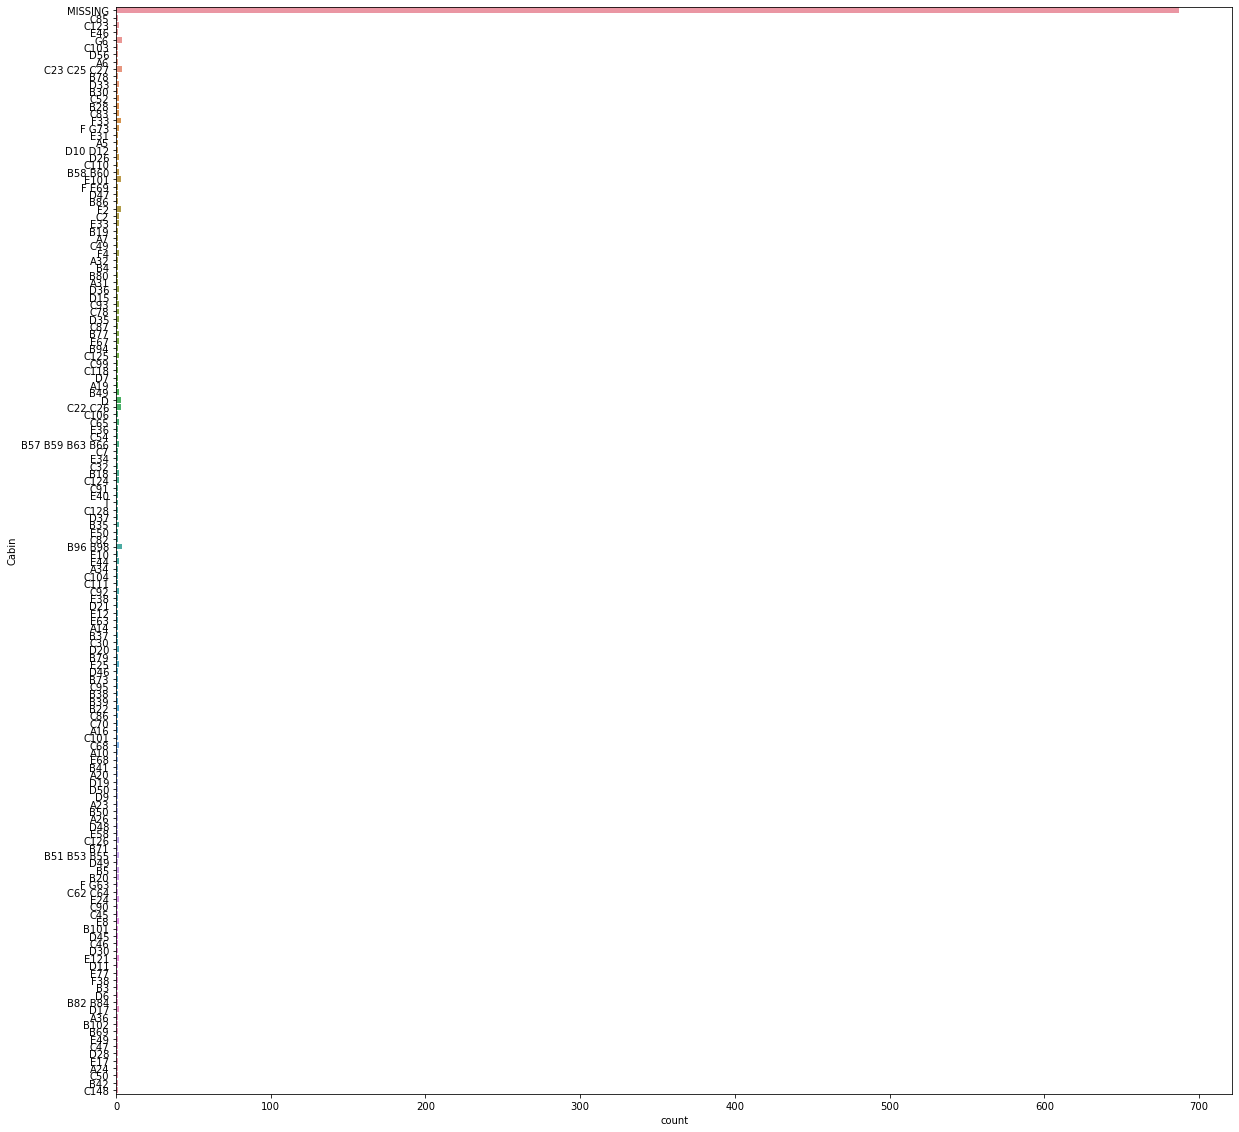

In [119]:
plt.figure(figsize=(20, 20))
sns.countplot(y = df['Cabin'])
plt.show()

In [120]:
df['Cabin'].value_counts()

MISSING        687
B96 B98          4
G6               4
C23 C25 C27      4
F2               3
              ... 
D30              1
B80              1
D6               1
C47              1
B38              1
Name: Cabin, Length: 148, dtype: int64

In [121]:
df['Cabin'].nunique()

148

In [122]:
df['Cabin'].str[0]

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [124]:
df['Cabin_new'] = df['Cabin'].str[0]
df.head()

,Survived,Cabin,Cabin_new
0,0,MISSING,M
1,1,C85,C
2,1,MISSING,M
3,1,C123,C
4,0,MISSING,M


In [125]:
df['Cabin_new'].nunique()

9

In [126]:
df.groupby('Cabin_new')['Survived'].mean()

Cabin_new
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [127]:
df.groupby('Cabin_new')['Survived'].mean().sort_values()

Cabin_new
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [128]:
ordinal_labels = df.groupby('Cabin_new')['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin_new')

In [132]:
{key:value for value, key in enumerate(ordinal_labels, 0)}

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [133]:
ordinal_encode = {key:value for value, key in enumerate(ordinal_labels, 0)}

In [134]:
df['Cabin_new'].map(ordinal_encode)

0      1
1      4
2      1
3      4
4      1
      ..
886    1
887    6
888    1
889    4
890    1
Name: Cabin_new, Length: 891, dtype: int64

In [135]:
df['Cabin_new'] = df['Cabin_new'].map(ordinal_encode)

In [136]:
df.head()

,Survived,Cabin,Cabin_new
0,0,MISSING,1
1,1,C85,4
2,1,MISSING,1
3,1,C123,4
4,0,MISSING,1


In [138]:
def target_encoding(df, feature, targetVar):
    ordinal_labels = df.groupby(feature)[targetVar].sum().sort_values().index
    ordinal_encode = {key:value for value, key in enumerate(ordinal_labels, 0)}
    new_name = feature + '_tg_encode'
    df[new_name] = df[feature].map(ordinal_encode)

### Benefits of Target Encoding

Target encoding is a simple and quick encoding method that doesn’t add to the dimensionality of the dataset. Therefore it may be used as a good first try encoding method.

### Limitations of Target Encoding

Target encoding is dependent on the distribution of the target which means target encoding requires careful validation as it can be prone to overfitting. This method is also dataset-specific and will only show significant improvements some of the time.